<a id="about"></a>
<div style="background-color: #f4a261; font-family: 'Times New Roman', serif; font-size: 24px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);">
    About Project & Dataset
</div>


<div style="font-family:Poppins;line-height:25px">

GOOGL, or Google’s stock, is a favored option among investors thanks to the company's excellent financial results and its dominant position in the tech sector. Although it experiences market fluctuations, Google’s stock is viewed as a solid long-term investment based on its financial health and industry standing.

The Google Stock Price dataset features historical pricing data from June 14, 2016, to September 21, 2024. This dataset consists of seven columns, each offering distinct insights into Google's stock performance.

    
<h3 align="left"><font color='#212F45'>About Dataset</font></h3>

</div><br>

<div align="center">
<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:15px">Variable Name</th>
<th style="text-align:center; font-weight: bold; font-size:15px">Description</th>
</tr>
</thead>
<tbody>
<tr>
<td><b><center>Open</center></b></td>
<td><center>Indicates the stock's opening price on that date<center></td>
</tr>
<tr>
<td><b><center>High</center></b></td>
<td><center>Shows the highest price at which the stock traded during the day<center></td>
</tr>
<tr>
<td><b><center>Low</center></b></td>
<td><center>Reflects the lowest price at which the stock traded during the day<center></td>
</tr>
<tr>
<td><b><center>Close</center></b></td>
<td><center>Denotes the stock's closing price on that date<center></td>
</tr>
<tr>
<td><b><center>Volume</center></b></td>
<td><center>Represents the total number of shares traded on that date<center></td>
</tr>
<tr>
<td><b><center>Dividends</center></b></td>
<td><center>Cash distributions to shareholders that may lower the stock price<center></td>
</tr>
<tr>
<td><b><center>Stock Splits</center></b></td>
<td><center>The division of shares to enhance affordability and liquidity, without altering overall value<center></td>
</tr>
</tbody>
</table>
</div>
<br><br>

<div style="font-family:Poppins;line-height:25px">

This dataset offers a rich source of information for investors and analysts aiming to deepen their understanding of Google’s stock performance. By examining the data over time, users can spot trends, assess the influence of external factors on stock prices, and make well-informed investment choices. The dataset is perfect for in-depth data analysis, including regression and time series analyses, as well as predictive modeling. It can also be utilized for creating informative visualizations like line graphs and candlestick charts to enhance comprehension of trends in Google’s stock performance.

</div>

<a id="pre"></a>
<div style="background-color: #f4a261; font-family: 'Times New Roman', serif; font-size: 24px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);">
    PreProcessing & Visualization
</div>

In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 15.3 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 5.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-cp310-cp310-linux_x86_64.whl size=300752 sha256=f6e45f4d3c00e29e220d41aecd9a0ff6732109dec125b30e4782e4401706340f
  Stored in directory: /root/.cache/pip/wheels/75/79/e5/8838db0594cc6c587142fd2563356392ade6255c5930411069
Successfully built peewee


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
from tqdm.notebook import tqdm
from datetime import timedelta
import matplotlib.pyplot as plt
from IPython.display import Image
import plotly.graph_objects as go
from keras.utils import plot_model
from keras.models import Sequential
from IPython.display import Image, display
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, SpatialDropout1D, Bidirectional, LSTM, Dense, Dropout

In [4]:
tck = yf.Ticker("GOOG")
# defining the start date 
start_date = "2016-06-14"
# historical data
df = tck.history(start=start_date, end=None)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-06-14 00:00:00-04:00,35.736238,36.035004,35.568647,35.825520,26122000,0.0,0.0
2016-06-15 00:00:00-04:00,35.861929,36.060439,35.777636,35.857937,24290000,0.0,0.0
2016-06-16 00:00:00-04:00,35.657932,35.744721,35.076858,35.430992,39650000,0.0,0.0
2016-06-17 00:00:00-04:00,35.345693,35.354175,34.338268,34.501266,68048000,0.0,0.0
2016-06-20 00:00:00-04:00,34.852907,35.037954,34.585566,34.600529,41650000,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-20 00:00:00-05:00,178.830002,179.110001,175.330002,177.330002,15729800,0.0,0.0
2024-11-21 00:00:00-05:00,175.455002,175.580002,165.309998,169.240005,38839400,0.0,0.0
2024-11-22 00:00:00-05:00,167.160004,168.264999,165.710007,166.570007,24497000,0.0,0.0


In [5]:
# Move column 'Close' to the first position
col_close = df.pop('Close')
df.insert(0, 'Close', col_close)
df.head()

,Close,Open,High,Low,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-06-14 00:00:00-04:00,35.825520,35.736238,36.035004,35.568647,26122000,0.0,0.0
2016-06-15 00:00:00-04:00,35.857937,35.861929,36.060439,35.777636,24290000,0.0,0.0
2016-06-16 00:00:00-04:00,35.430992,35.657932,35.744721,35.076858,39650000,0.0,0.0
2016-06-17 00:00:00-04:00,34.501266,35.345693,35.354175,34.338268,68048000,0.0,0.0
2016-06-20 00:00:00-04:00,34.600529,34.852907,35.037954,34.585566,41650000,0.0,0.0


In [6]:
df.columns

Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [7]:
columns=['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

In [8]:
df.shape

(2129, 7)

- There are 7 columns & 2082 rows in this dataset.

In [9]:
def check_df(df: object, head: object = 5) -> object:
    print("\nShape")
    print(df.shape)
    print("\nTypes")
    print(df.dtypes)
    print("\nNANs")
    print(df.isnull().sum())
    print("\nInfo")
    print(df.info())
check_df(df)


Shape
(2129, 7)

Types
Close           float64
Open            float64
High            float64
Low             float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

NANs
Close           0
Open            0
High            0
Low             0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2129 entries, 2016-06-14 00:00:00-04:00 to 2024-11-26 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         2129 non-null   float64
 1   Open          2129 non-null   float64
 2   High          2129 non-null   float64
 3   Low           2129 non-null   float64
 4   Volume        2129 non-null   int64  
 5   Dividends     2129 non-null   float64
 6   Stock Splits  2129 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 133.1 KB
None


In [10]:
df['Volume'] = df['Volume'].astype('float64')

In [11]:
print('Number of duplicated rows: ' , len(df[df.duplicated()]))

Number of duplicated rows:  0


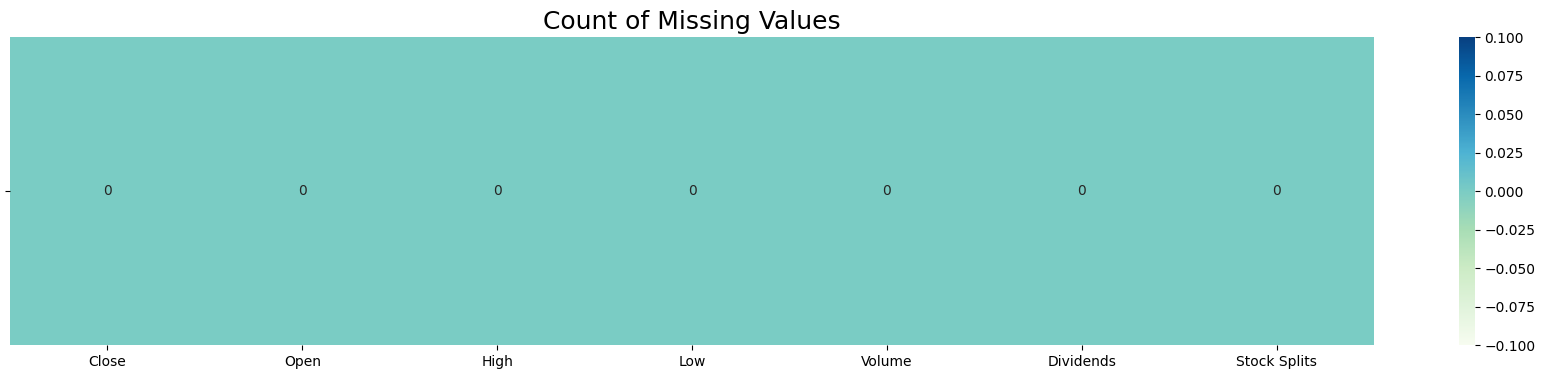

In [12]:
plt.figure(figsize=(22,4))
sns.heatmap((df.isna().sum()).to_frame(name='').T,cmap='GnBu', annot=True,
             fmt='0.0f').set_title('Count of Missing Values', fontsize=18)
plt.show()

- There is no duplicated row & no NAN data.

In [13]:
df.describe().T.style.background_gradient(cmap='GnBu', axis=1)

,count,mean,std,min,25%,50%,75%,max
Close,2129.000000,90.163093,41.457919,33.331142,54.412872,75.858696,126.970184,192.406723
Open,2129.000000,90.108038,41.460363,33.467808,54.394916,76.066696,127.262464,191.497912
High,2129.000000,91.078673,41.907263,33.532651,55.098191,77.787467,129.452094,193.055862
Low,2129.000000,89.218149,41.034621,33.082954,53.761972,75.220773,126.100323,190.369396
Volume,2129.000000,28980413.527478,13255565.497008,6936000.000000,20560000.000000,25816000.000000,33218000.000000,124140000.000000
Dividends,2129.000000,0.000188,0.006129,0.000000,0.000000,0.000000,0.000000,0.200000
Stock Splits,2129.000000,0.009394,0.433453,0.000000,0.000000,0.000000,0.000000,20.000000


<div style="border-radius:10px; padding: 15px;
            ; font-size:110%; text-align:left">

- we can see statistical information on the table above.

In [14]:
# finding unique data
df.apply(lambda x: len(x.unique()))

Close           2097
Open            2129
High            2129
Low             2129
Volume          2063
Dividends          2
Stock Splits       2
dtype: int64

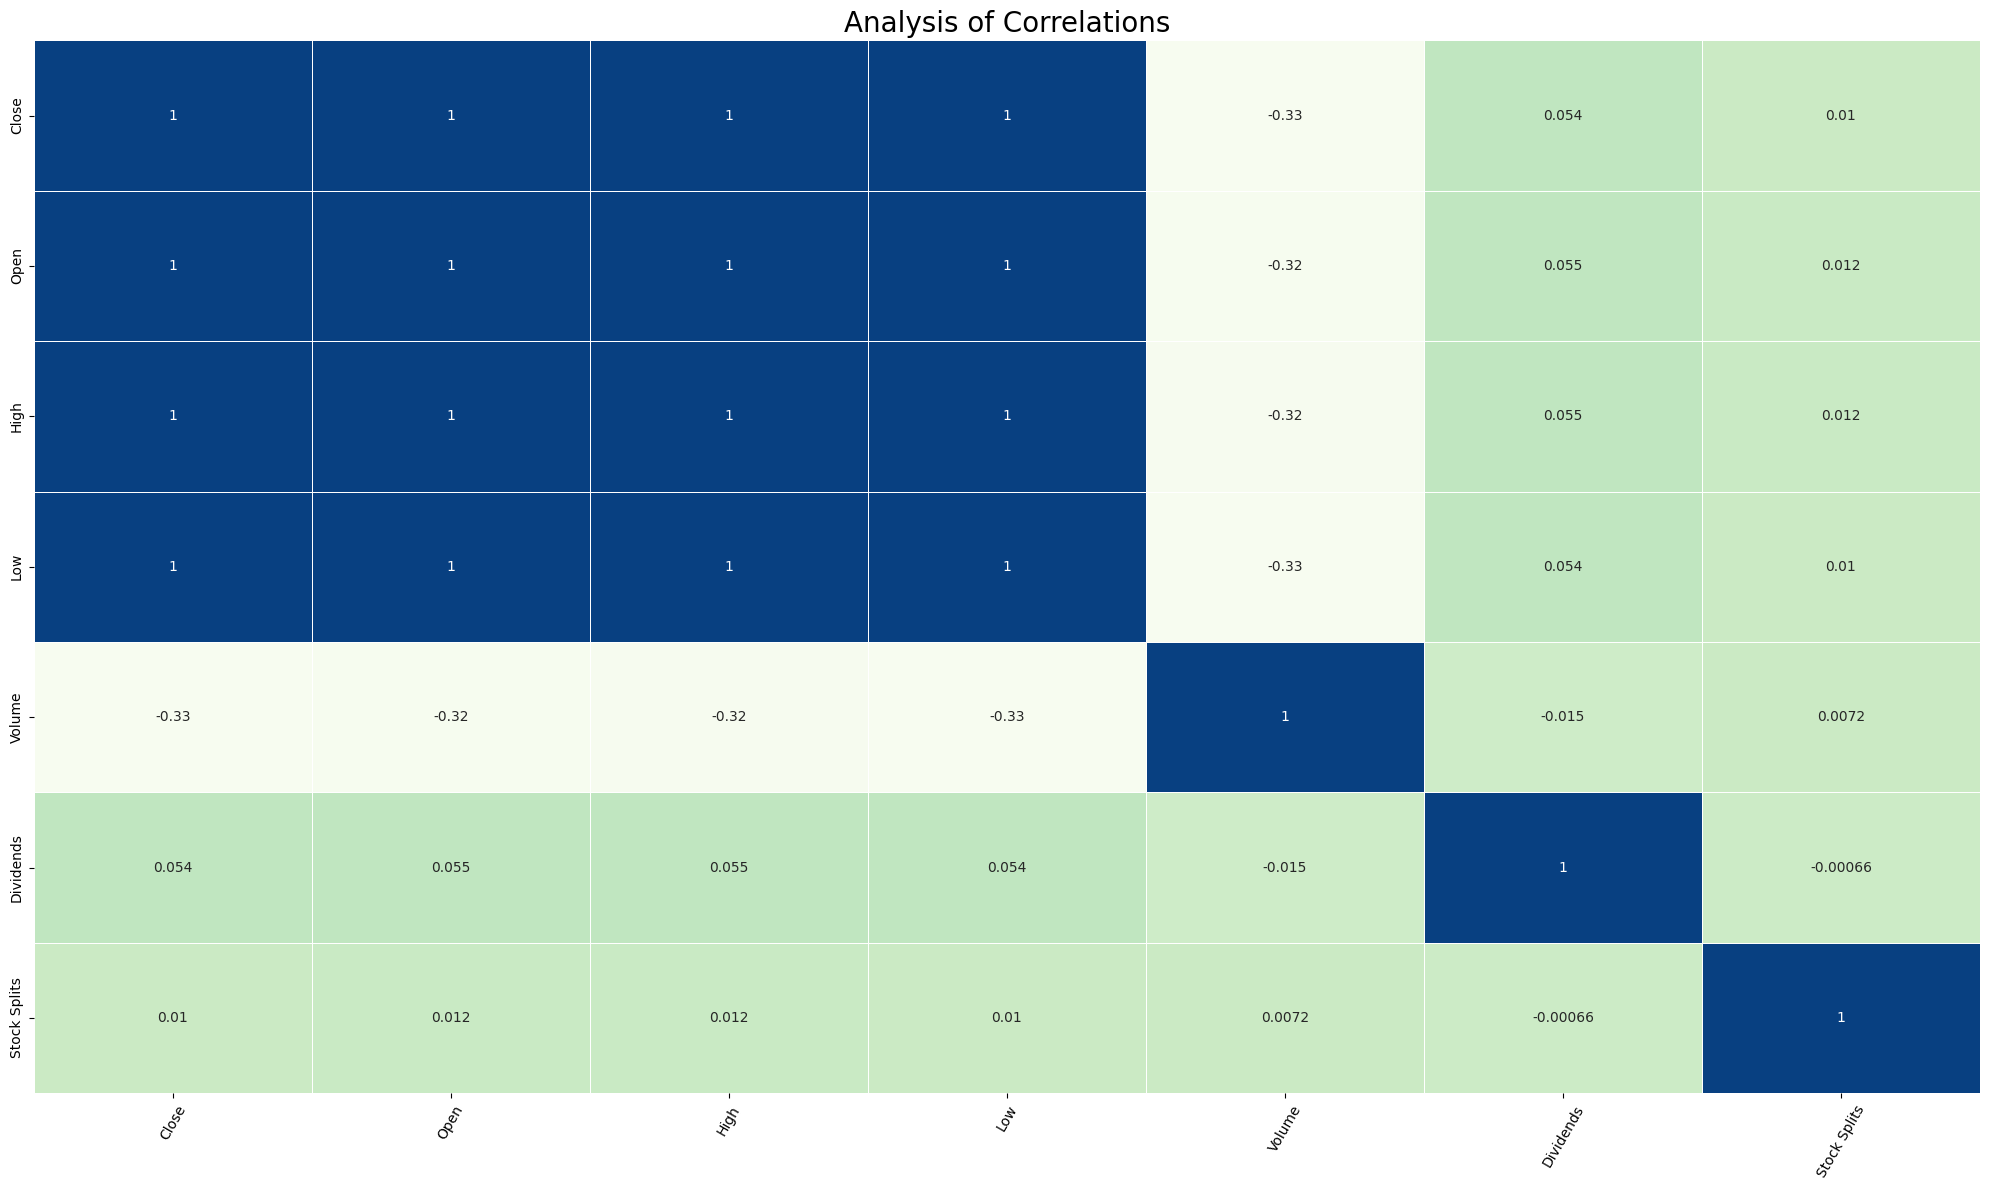

In [15]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(numeric_only=True), cmap="GnBu", annot=True, linewidths=.6 , cbar = False)
plt.xticks(rotation=60, size=10)
plt.yticks(size=10)
plt.title('Analysis of Correlations', size=20)
plt.tight_layout()
plt.show()

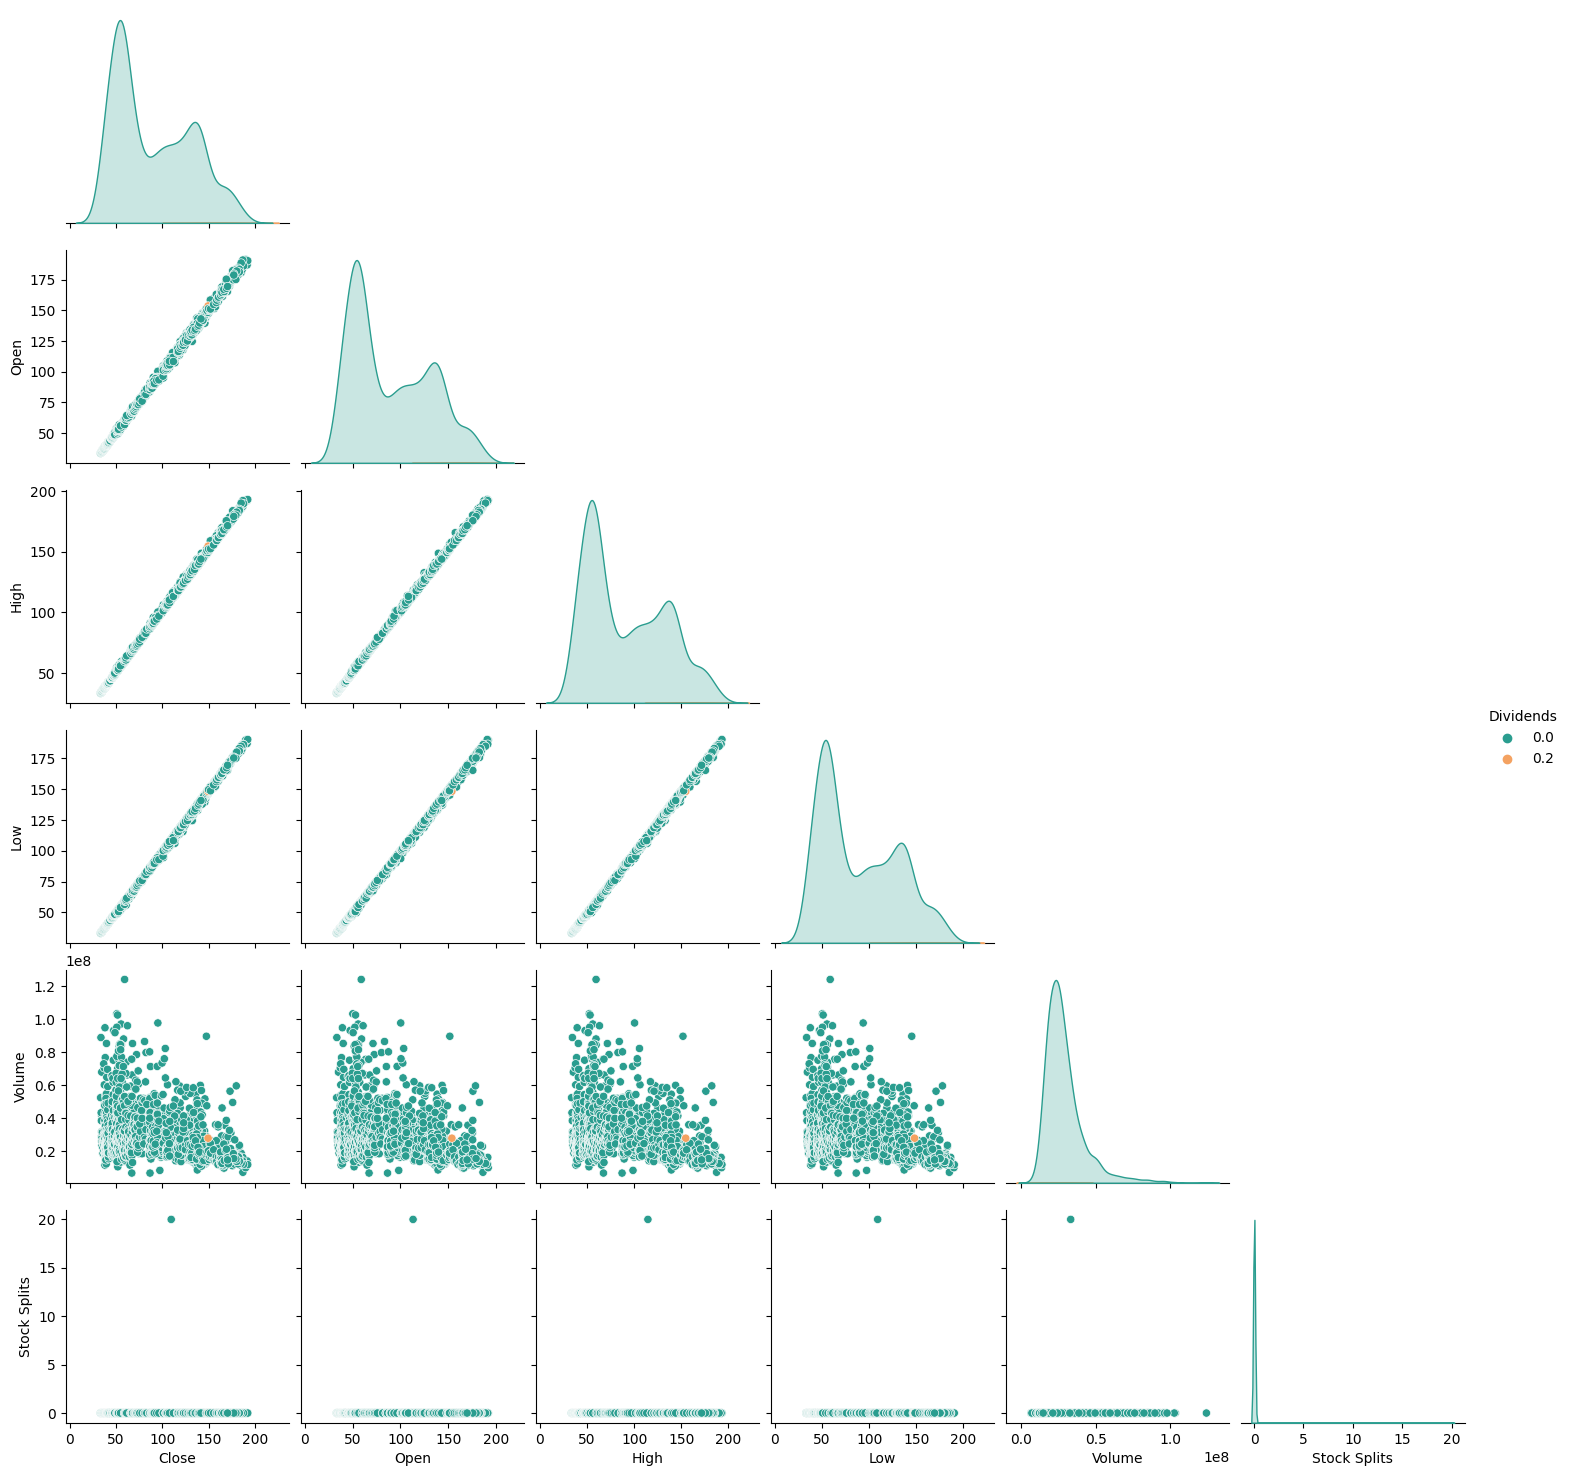

In [17]:
import warnings
warnings.filterwarnings('ignore')
custom_palette = sns.color_palette(['#2a9d8f', '#f4a261'])
sns.pairplot(data=df, diag_kind='kde', hue='Dividends', palette=custom_palette,corner=True)
plt.gcf().set_facecolor('#ffffff')
plt.show()

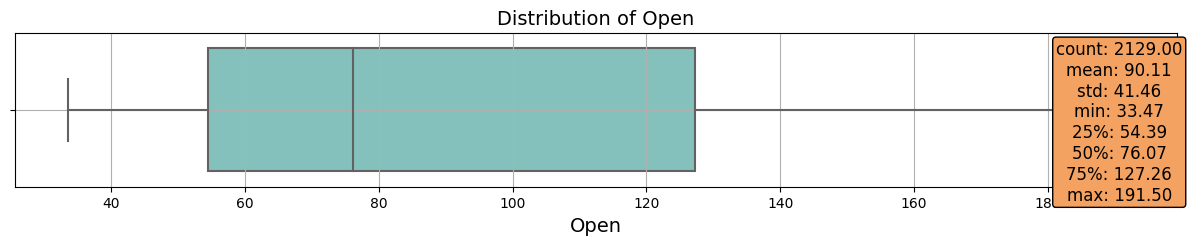

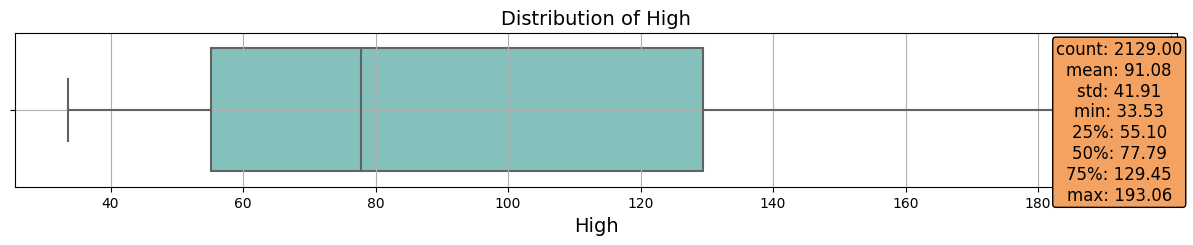

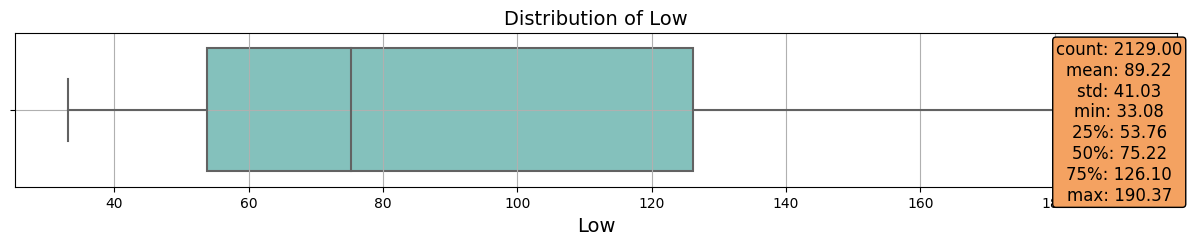

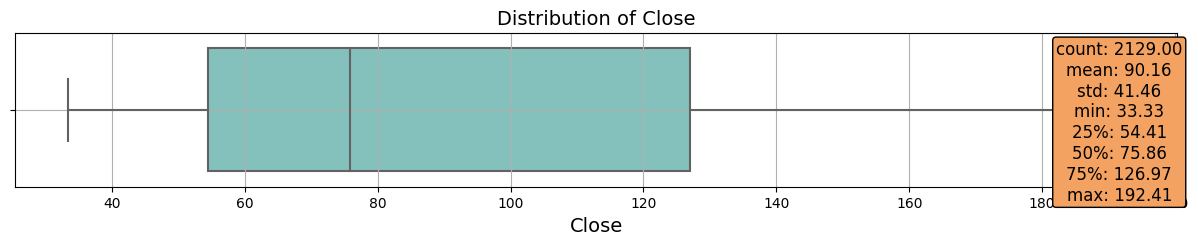

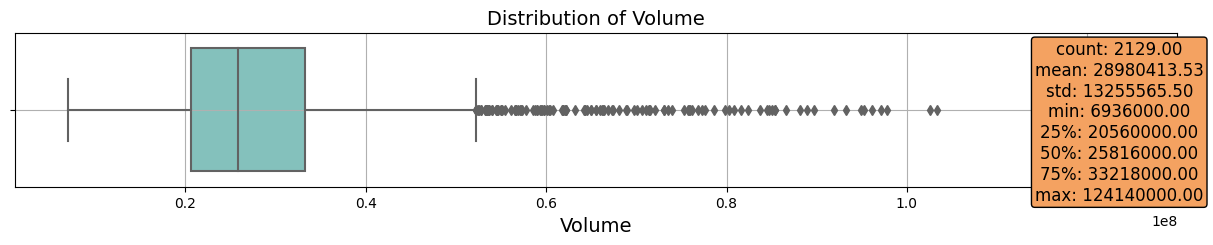

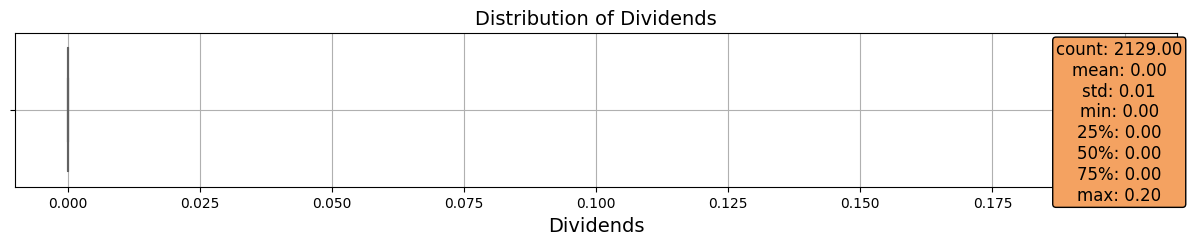

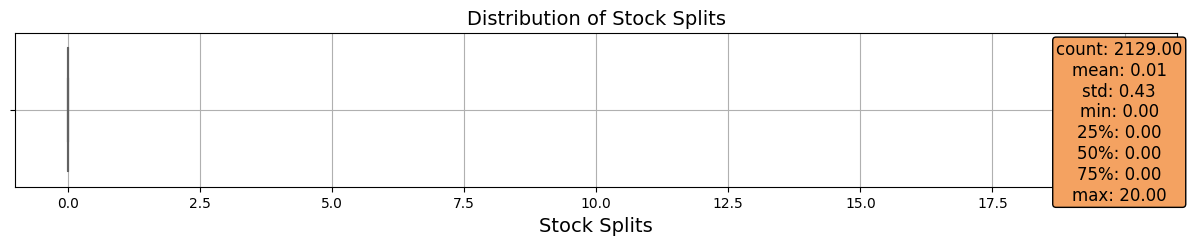

In [19]:
palette = "GnBu" 
for column in columns:
    plt.figure(figsize=(15, 2)) 
    sns.boxplot(x=df[column], palette=palette)
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=14)
    stats = df[column].describe()
    stats_text = "\n".join([f"{key}: {value:.2f}" for key, value in stats.items()])
    plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, 
             fontsize=12, verticalalignment='top', 
             horizontalalignment='center', bbox=dict(boxstyle='round,pad=0.2', edgecolor='black', facecolor='#f4a261'))
    plt.grid(True) 
    plt.show()

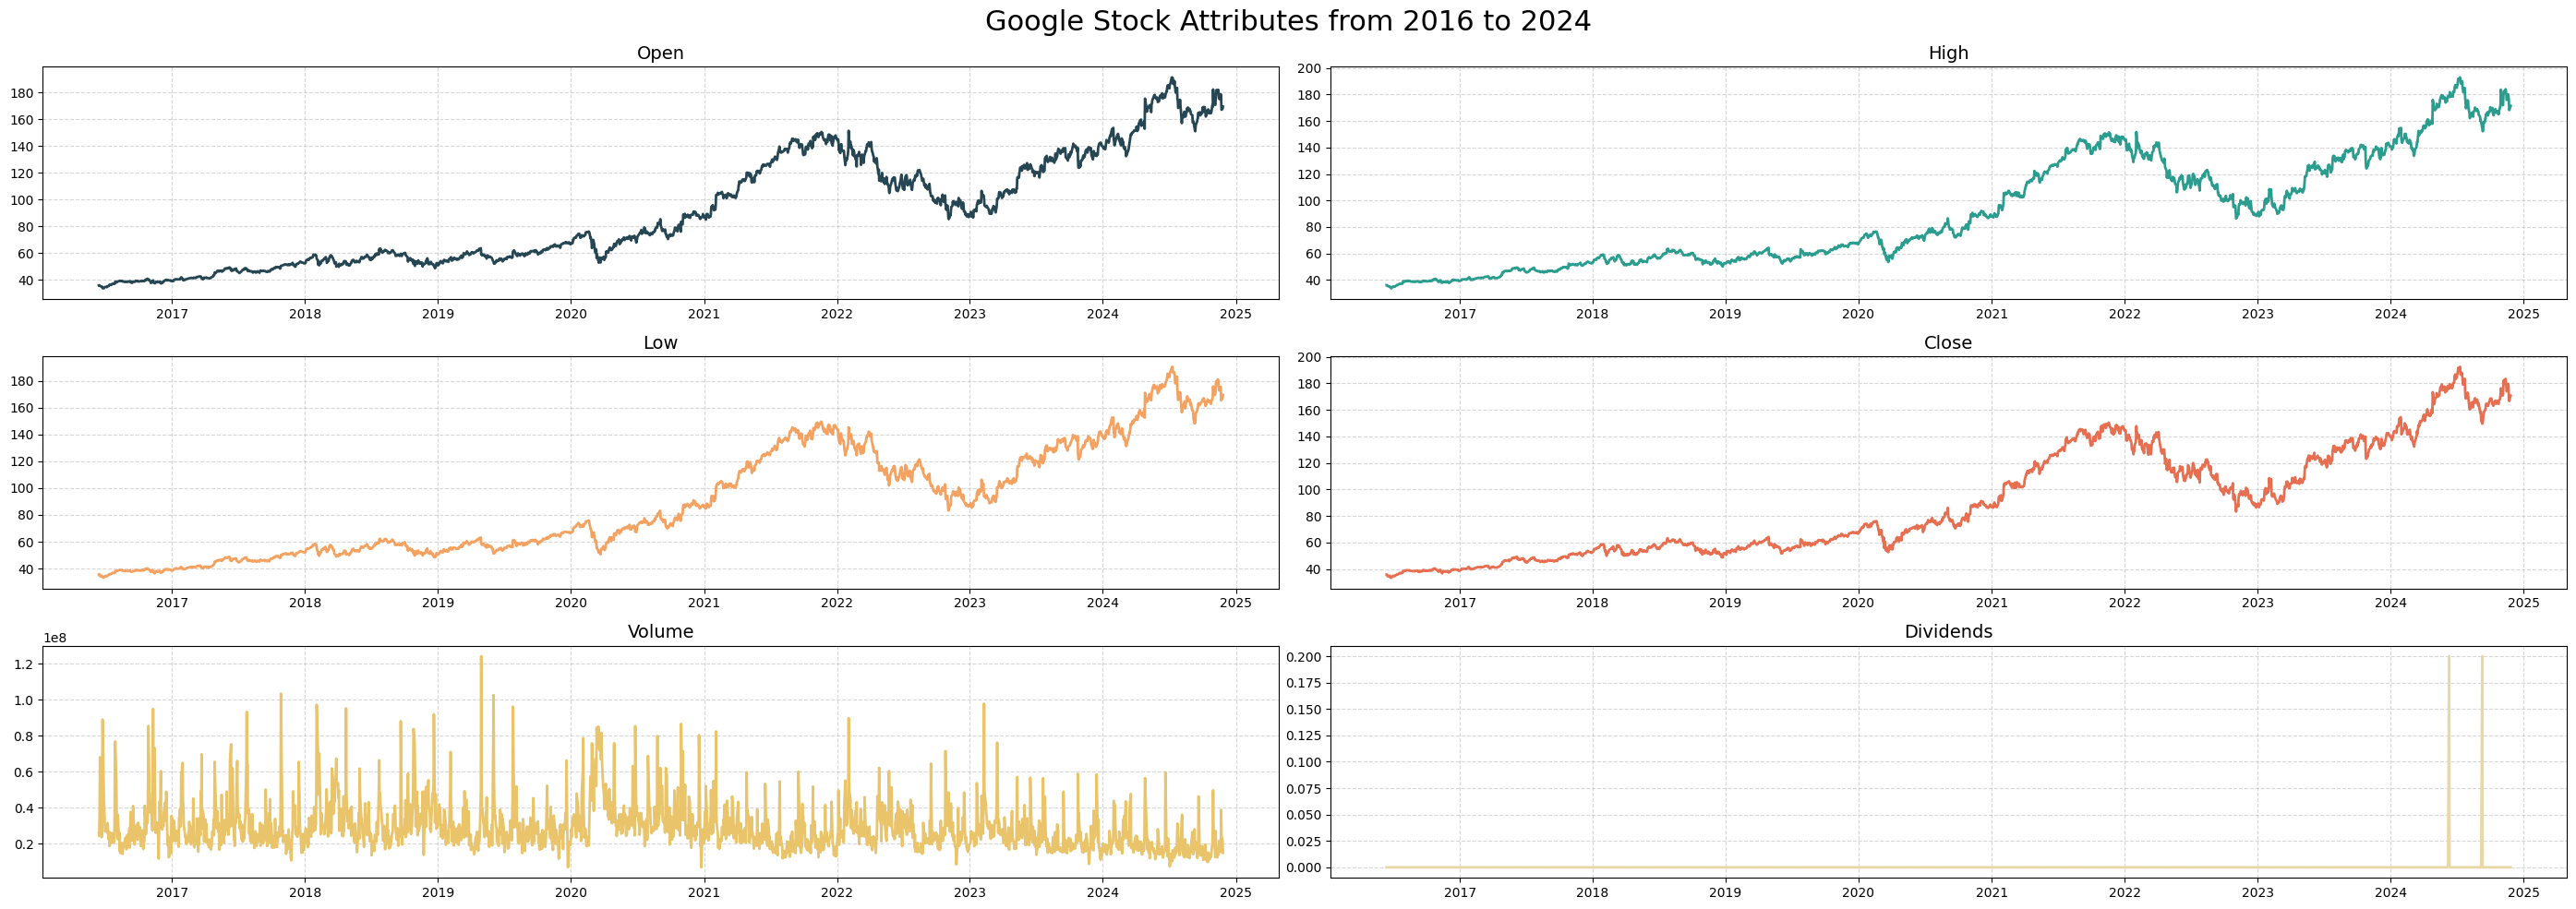

In [20]:
import matplotlib.pyplot as plt
x=df.index
colors = ['#264653', '#2a9d8f', '#f4a261', '#e76f51','#e9c46a', '#e9d8a6']
plt.figure(figsize=(28, 10))
plt.subplot(3, 2, 1)
plt.plot(x, df['Open'], color=colors[0], linewidth=2)
plt.title('Open', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 2)
plt.plot(x, df['High'], color=colors[1], linewidth=2)
plt.title('High', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 3)
plt.plot(x, df['Low'], color=colors[2], linewidth=2)
plt.title('Low', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 4)
plt.plot(x, df['Close'], color=colors[3], linewidth=2)
plt.title('Close', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 5)
plt.plot(x, df['Volume'], color=colors[4], linewidth=2)
plt.title('Volume', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 6)
plt.plot(x, df['Dividends'], color=colors[5], linewidth=2)
plt.title('Dividends', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.suptitle('Google Stock Attributes from 2016 to 2024', fontsize=22, y=0.98)
plt.tight_layout()
plt.show()

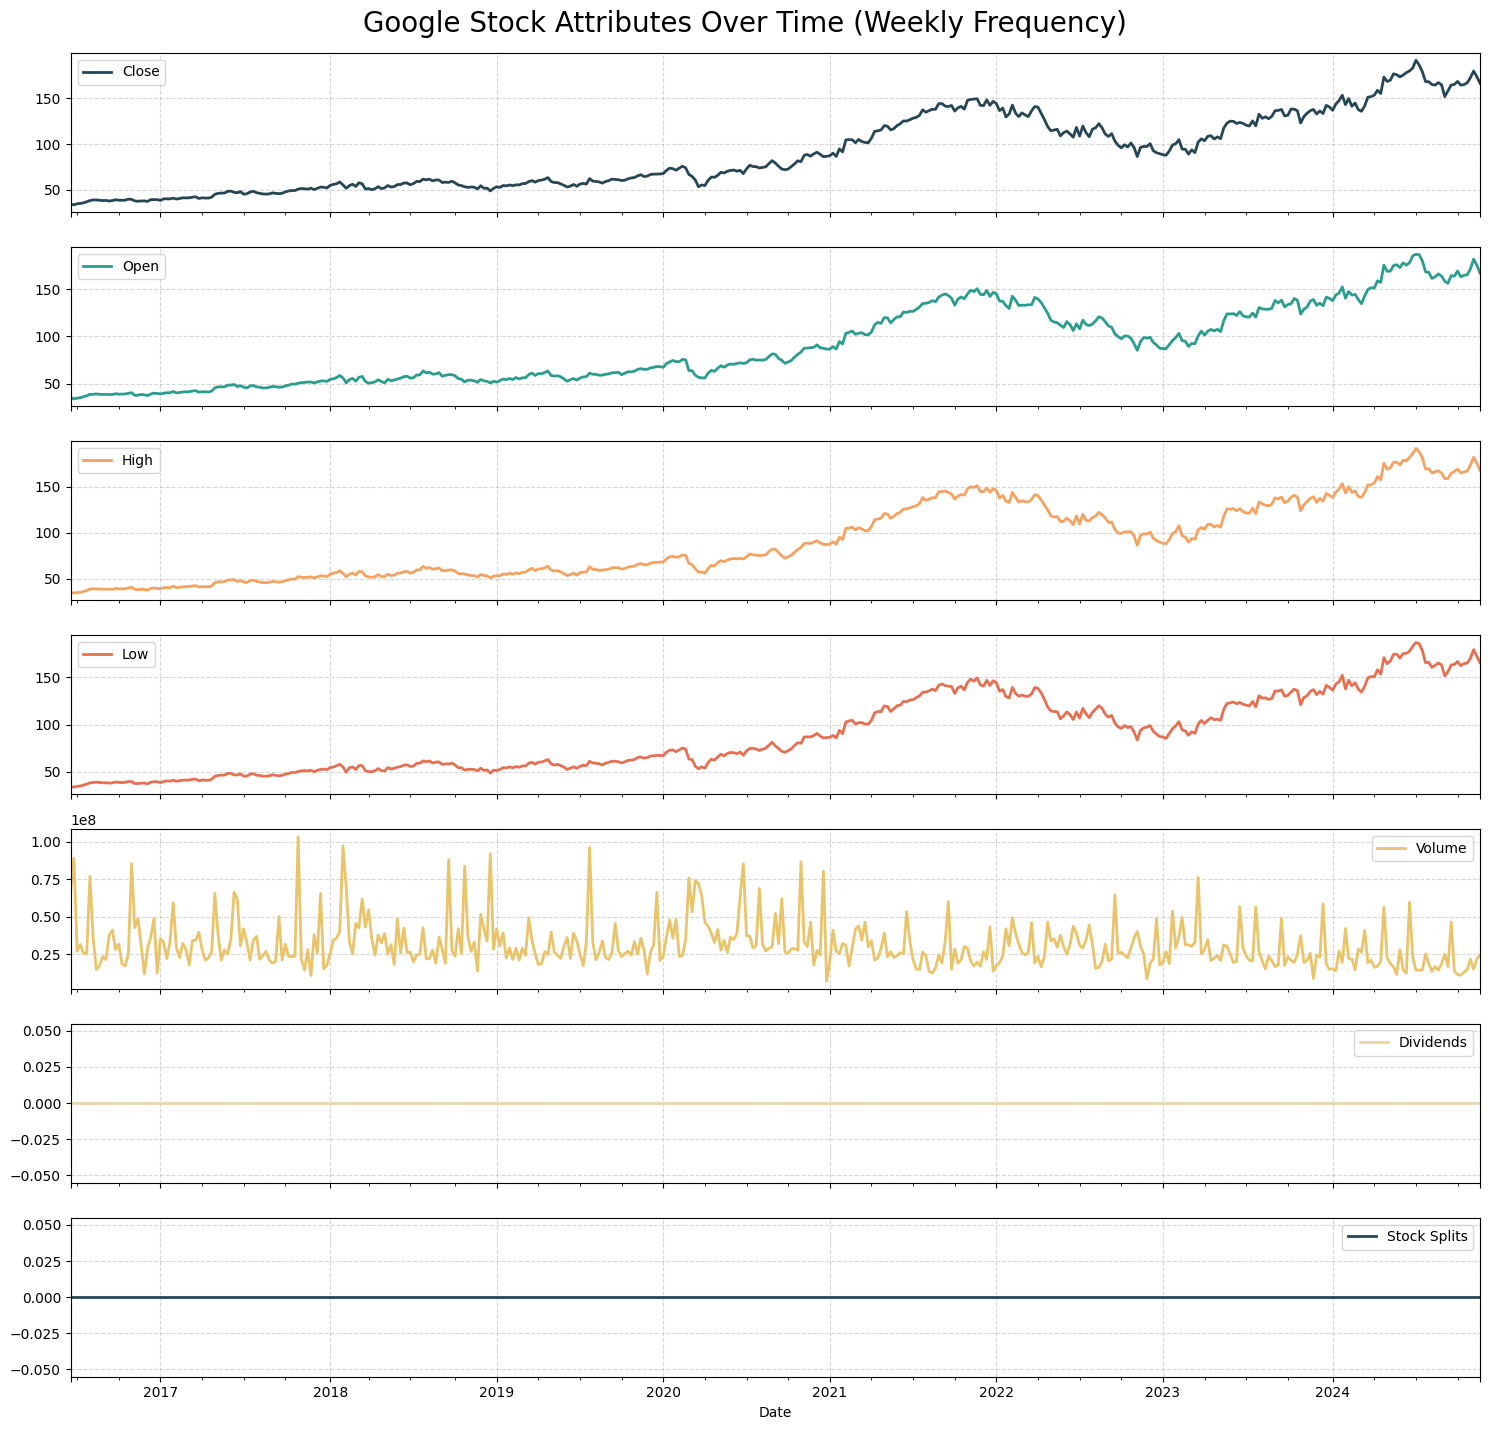

In [21]:
colors = ['#264653', '#2a9d8f', '#f4a261', '#e76f51', '#e9c46a', '#e9d8a6']
df_weekly = df.asfreq('W', method='ffill')
df_weekly.plot(subplots=True, figsize=(15, 15), style='-', color=colors, linewidth=2)
plt.suptitle('Google Stock Attributes Over Time (Weekly Frequency)', fontsize=20, y=0.95)
for ax in plt.gcf().get_axes():
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_title(ax.get_title(), fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

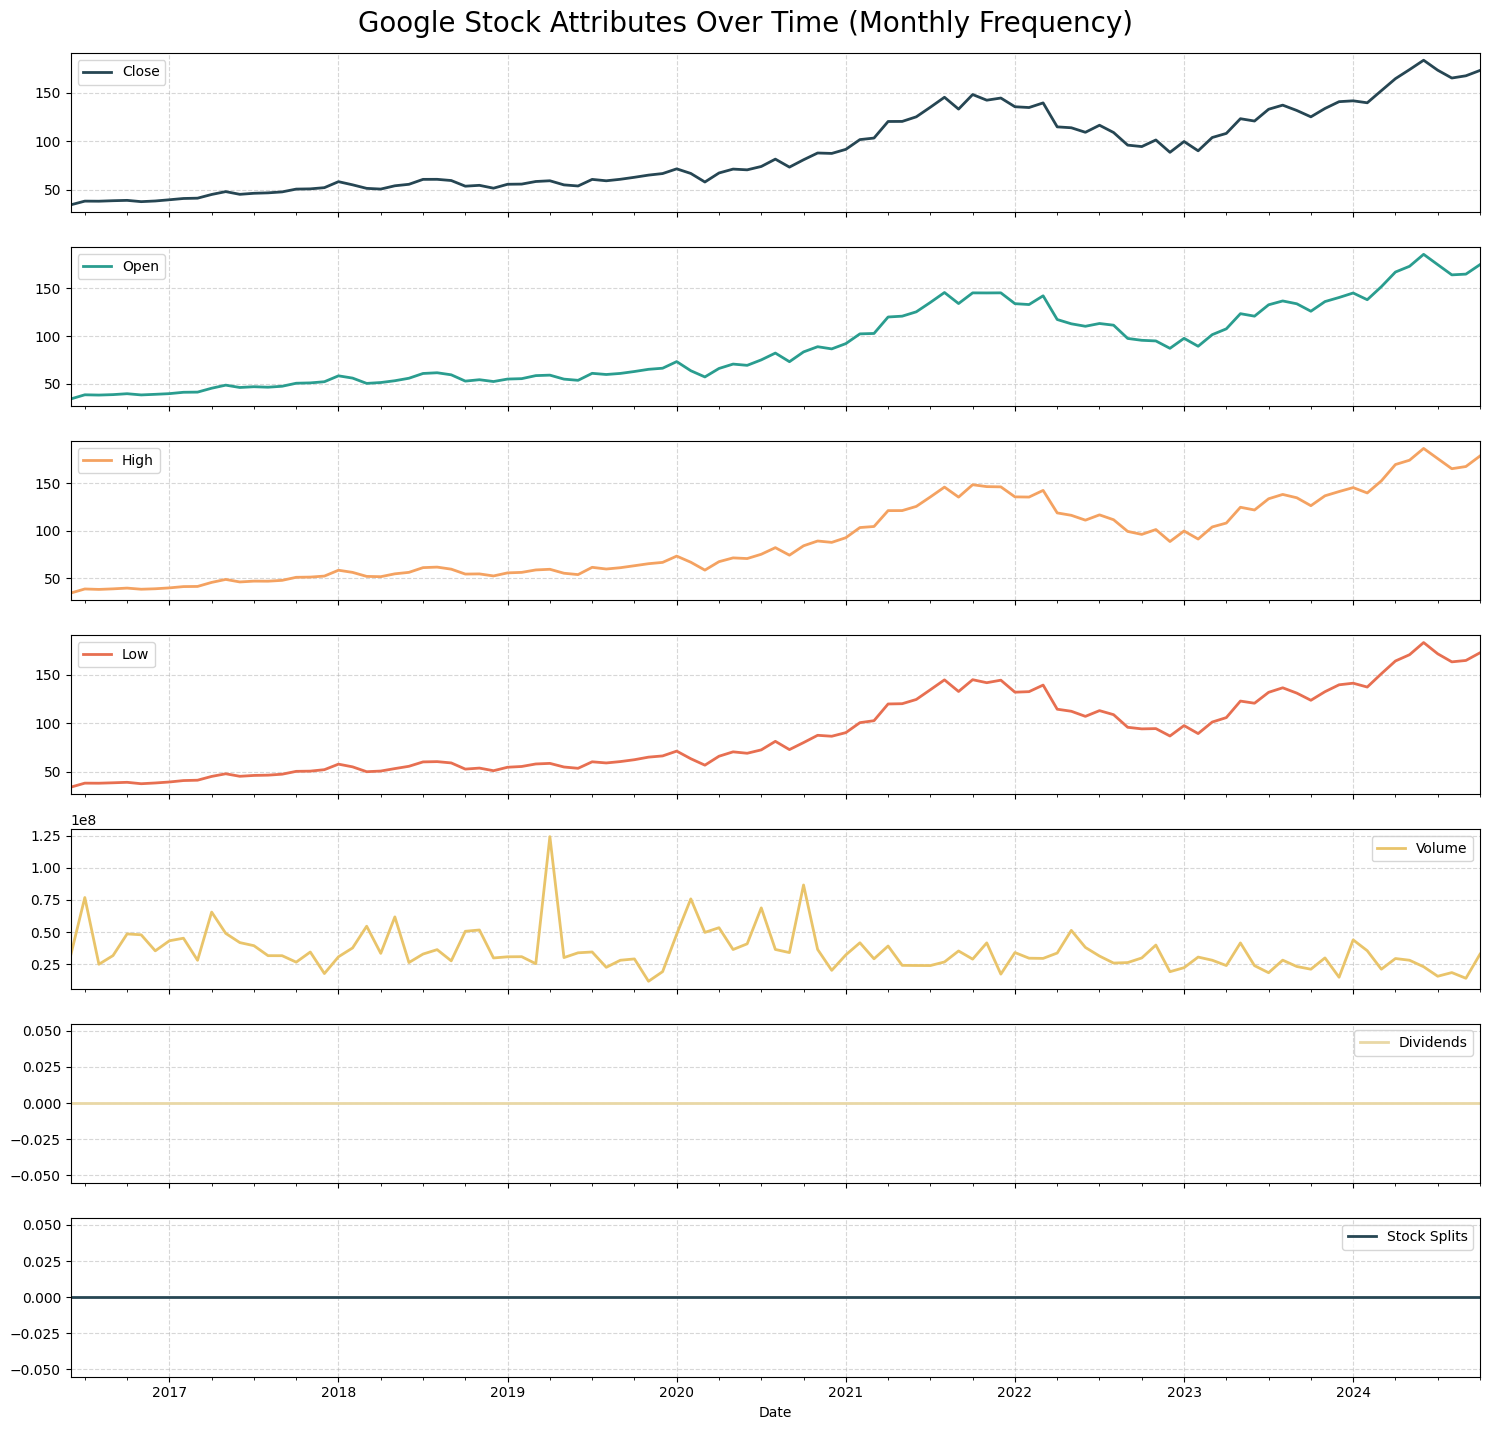

In [22]:
colors = ['#264653', '#2a9d8f', '#f4a261', '#e76f51', '#e9c46a', '#e9d8a6']
df_weekly = df.asfreq('M', method='ffill')
df_weekly.plot(subplots=True, figsize=(15, 15), style='-', color=colors, linewidth=2)
plt.suptitle('Google Stock Attributes Over Time (Monthly Frequency)', fontsize=20, y=0.95)
for ax in plt.gcf().get_axes():
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_title(ax.get_title(), fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

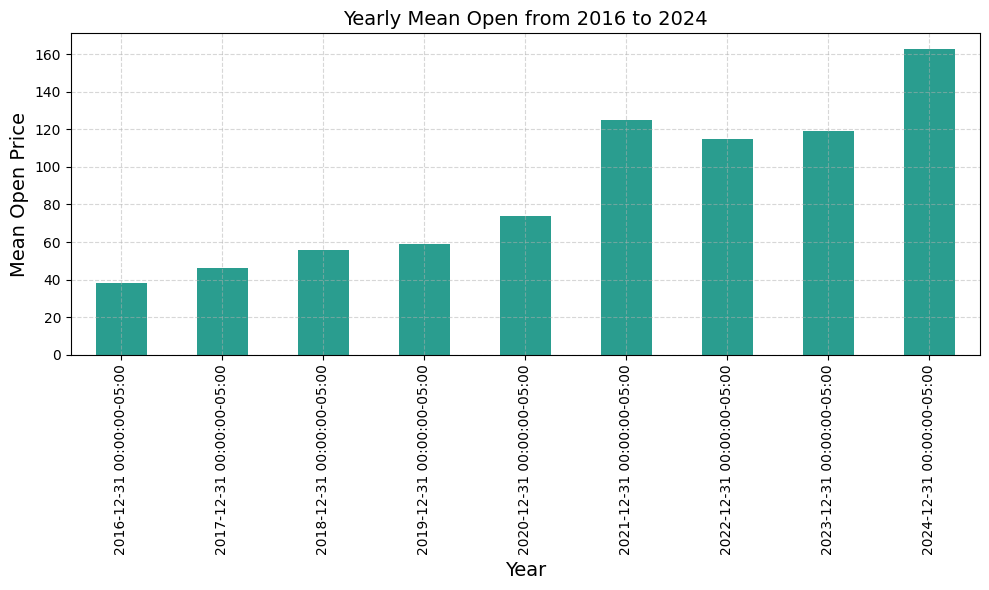

In [27]:
import math
import yfinance as yf
import datetime as dt
# Resampling the 'Open' data by year-end and plotting the mean values
plt.figure(figsize=(10, 6))  # Set figure size
df['Open'].resample('A').mean().plot(kind='bar', color='#2a9d8f')  # Updated color
plt.title('Yearly Mean Open from 2016 to 2024', fontsize=14)  # Title with larger font
plt.xlabel('Year', fontsize=14)  # X-axis label with larger font
plt.ylabel('Mean Open Price', fontsize=14)  # Y-axis label with larger font
plt.grid(True, linestyle='--', alpha=0.5)  # Grid with dashed lines
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

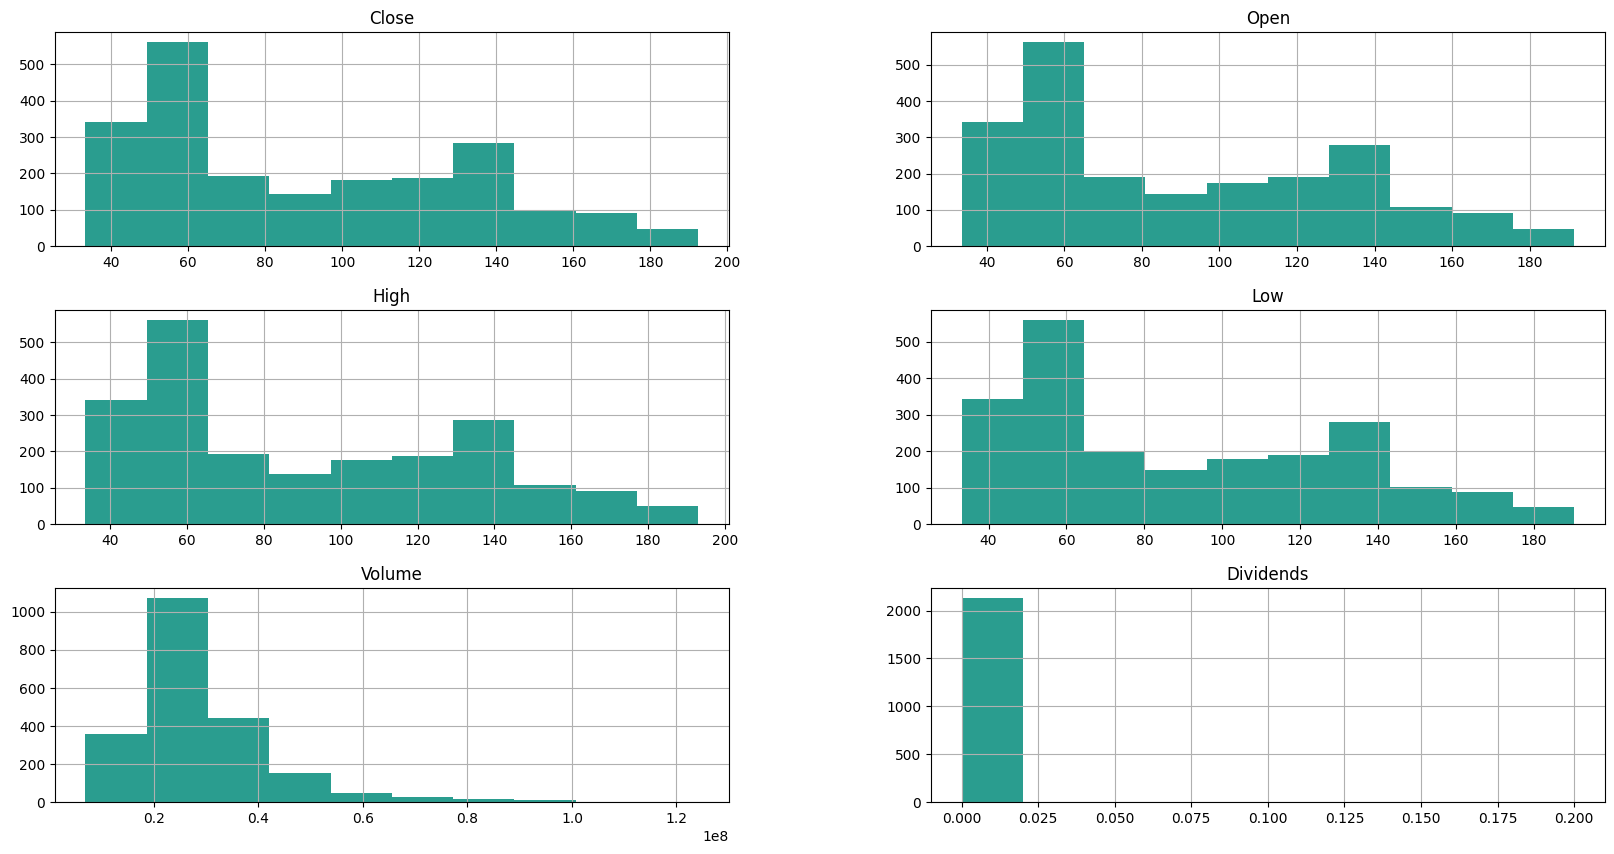

In [29]:
df1 = df.copy()
df1.drop("Stock Splits", axis=1, inplace=True)
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
hist=df1.hist(ax = ax , color= '#2a9d8f')

In [30]:
df[['Close']]

,Close
Date,
2016-06-14 00:00:00-04:00,35.825520
2016-06-15 00:00:00-04:00,35.857937
2016-06-16 00:00:00-04:00,35.430992
2016-06-17 00:00:00-04:00,34.501266
2016-06-20 00:00:00-04:00,34.600529
...,...
2024-11-20 00:00:00-05:00,177.330002
2024-11-21 00:00:00-05:00,169.240005
2024-11-22 00:00:00-05:00,166.570007


#### SMA  (Simple Moving Average)
Calculating the moving averages for certain periods and different window sizes.

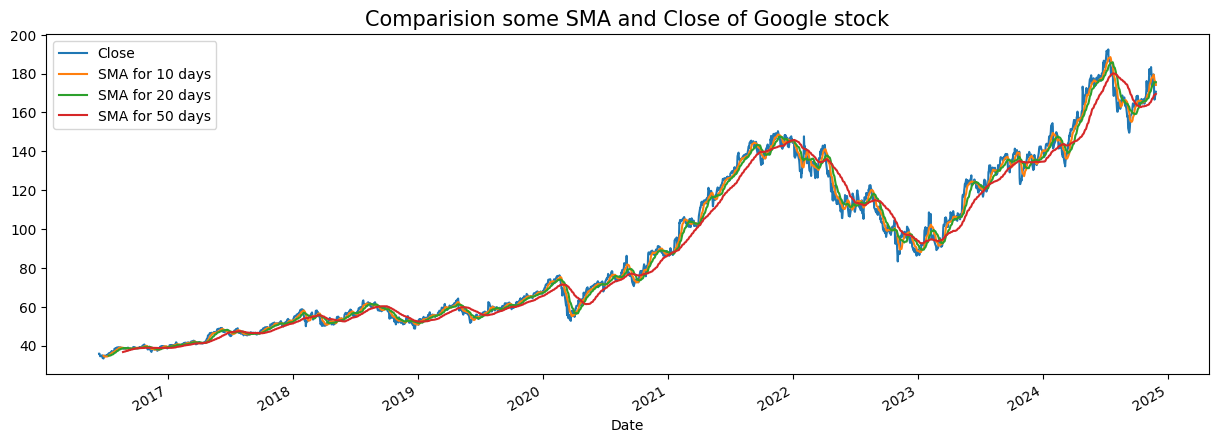

In [31]:
md = [10, 20, 50]
for SMA in md:
    col = f'SMA for {SMA} days'
    df[col] = df['Close'].rolling(SMA).mean()
df[['Close', 'SMA for 10 days', 'SMA for 20 days', 'SMA for 50 days']].plot(figsize=(15,5))
plt.title('Comparision some SMA and Close of Google stock', fontsize=15)
plt.show()

- The graph shows that the optimal durations for measuring the moving average are '10 and 20 days', as they effectively capture trends in the data while minimizing noise. (The 50-day moving average differs somewhat from the original data, whereas the 10-day and 20-day moving averages demonstrate stronger performance)

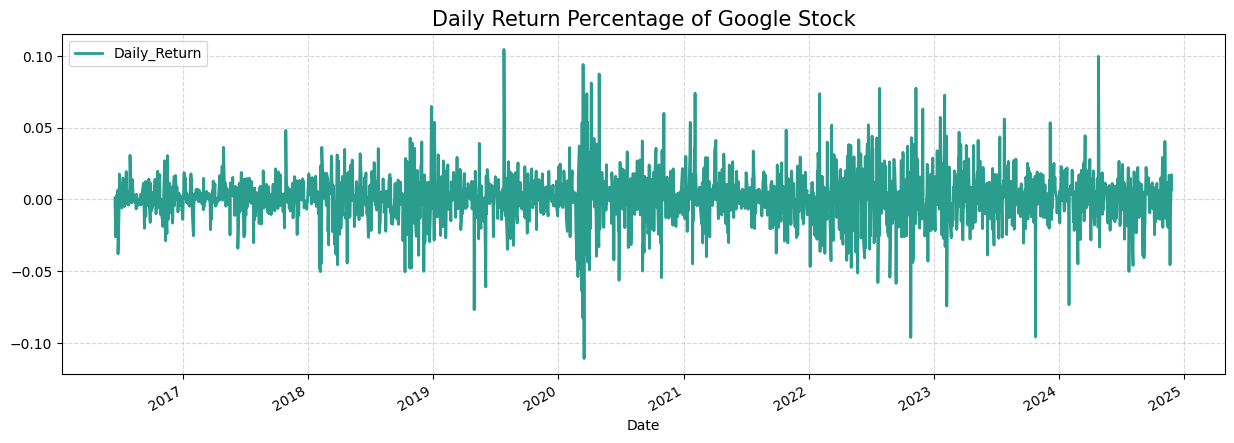

In [32]:
df['Daily_Return'] = df['Close'].pct_change()
df['Daily_Return'].plot(legend=True, figsize=(15, 5), color='#2a9d8f', linewidth=2)
plt.title('Daily Return Percentage of Google Stock', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [33]:
# Create a deep copy of the original dataframe
df2 = df.copy(deep=True)

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Apply scaling to each column individually
df2['Open'] = scaler.fit_transform(df2.Open.values.reshape(-1, 1))
df2['High'] = scaler.fit_transform(df2.High.values.reshape(-1, 1))
df2['Low'] = scaler.fit_transform(df2.Low.values.reshape(-1, 1))
df2['Close'] = scaler.fit_transform(df2.Close.values.reshape(-1, 1))
df2['Volume'] = scaler.fit_transform(df2.Volume.values.reshape(-1, 1))

# Select the relevant columns for further processing
df3 = df2[['Open', 'High', 'Low', 'Volume', 'Close']].values

# Output the shape of the resulting dataframe
df3.shape

(2129, 5)

In [37]:
df2.sample(5)

,Close,Open,High,Low,Volume,Dividends,Stock Splits,SMA for 10 days,SMA for 20 days,SMA for 50 days,Daily_Return
Date,,,,,,,,,,,
2019-01-24 00:00:00-05:00,-0.745626,-0.744045,-0.745380,-0.747949,-0.653766,0.0,0.0,53.560864,52.986025,52.452536,-0.001553
2018-11-26 00:00:00-05:00,-0.761479,-0.768114,-0.764243,-0.764940,-0.455309,0.0,0.0,51.874655,52.369141,55.050416,0.024163
2021-06-24 00:00:00-04:00,0.177290,0.180464,0.174630,0.189753,-0.795263,0.0,0.0,125.982061,124.049757,119.606608,0.006488
2024-07-09 00:00:00-04:00,0.972125,1.000000,0.994366,0.995047,-0.944328,0.0,0.0,187.013818,182.563677,176.885809,-0.000210
2023-04-28 00:00:00-04:00,-0.061783,-0.062608,-0.066066,-0.075607,-0.709534,0.0,0.0,105.820126,105.970755,100.204117,-0.001384


<a id="tf"></a>
<div style="background-color: #f4a261; font-family: 'Times New Roman', serif; font-size: 24px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);">
    Modeling (Tensorflow)
</div>

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #ffffff; font-size:100%; text-align:left">

<h2 align="left"><font color='Black'>Time Series Forecasting with Recurrent Neural Networks (RNN)</font></h2>

**Time Series Data:** In a time series, each data point is associated with a timestamp indicating when the observation was made. This type of data is widely used in fields such as finance, economics, weather forecasting, and machine learning. A key characteristic of time series data is its tendency to exhibit patterns or trends over time, such as seasonal variations or cyclical behaviors. By analyzing these patterns, predictions can be made, and insights into the underlying events can be gained.

Recurrent Neural Networks (RNN) leverage the temporal relationships within the data, as they maintain a form of memory regarding previous inputs. This makes RNNs particularly well-suited for sequential time series data. RNN, a model created to retain information in short-term memory for predicting future values, seems ideal for our dataset because the autocorrelations indicate no seasonality and are influenced by recent prices. Additionally, we'll implement LSTM, a specialized version of RNN, which could uncover interesting long-term dependencies or relationships within the data.

#### Preparing Data for Time Series

To set up the dataset for predicting stock prices, we need to treat it as a time series challenge. We'll utilize the prices from the previous 10 days to forecast the next day's price. Let's create the sequences accordingly:

In [39]:
seq_len = 11
sequence = []
for index in range(len(df3) - seq_len + 1): 
    sequence.append(df3[index: index + seq_len])
sequence = np.array(sequence)
print(sequence.shape)

(2119, 11, 5)


#### Splitting the Data

Deviding the dataset into the training set (80%), test set (10%), & validation set (10%).

In [40]:
def split_data(sequence):
    train_data, test_data = train_test_split(sequence, test_size=0.2, shuffle=False)
    val_data, test_data = train_test_split(test_data, test_size=0.5, shuffle=False)
    return train_data, val_data, test_data

In [41]:
train_data, val_data, test_data = split_data(sequence)
print("Train:", train_data.shape, "Validation:", val_data.shape, "Test:", test_data.shape)

Train: (1695, 11, 5) Validation: (212, 11, 5) Test: (212, 11, 5)


In [42]:
x_train = train_data[:, :-1, :]
y_train = train_data[:, -1, -1] 
x_valid = val_data[:, :-1, :]
y_valid = val_data[:, -1, -1]
x_test = test_data[:, :-1, :]
y_test = test_data[:, -1, -1]
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_valid shape: {x_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (1695, 10, 5)
y_train shape: (1695,)
x_valid shape: (212, 10, 5)
y_valid shape: (212,)
x_test shape: (212, 10, 5)
y_test shape: (212,)


#### Defining Model
Using Long Short-term Memory (LSTM) to capture the sequential information.

In [43]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model_lstm.add(LSTM(units=32, return_sequences=False))
model_lstm.add(Dense(units=25))
model_lstm.add(Dense(units=1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_lstm.fit(x_train, y_train, epochs=50, batch_size=32,
                       validation_data=(x_valid, y_valid))

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0565 - val_loss: 0.0028
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 0.0029
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - val_loss: 0.0026
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 0.0029
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 0.0035
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 10/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 11/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 12/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_l

In [44]:
# Predict on the test data
y_pred = model_lstm.predict(x_test)

# Evaluate the predictions
test_loss = model_lstm.evaluate(x_test, y_test)
print("Test Loss:", test_loss)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017 
Test Loss: 0.0016541676595807076


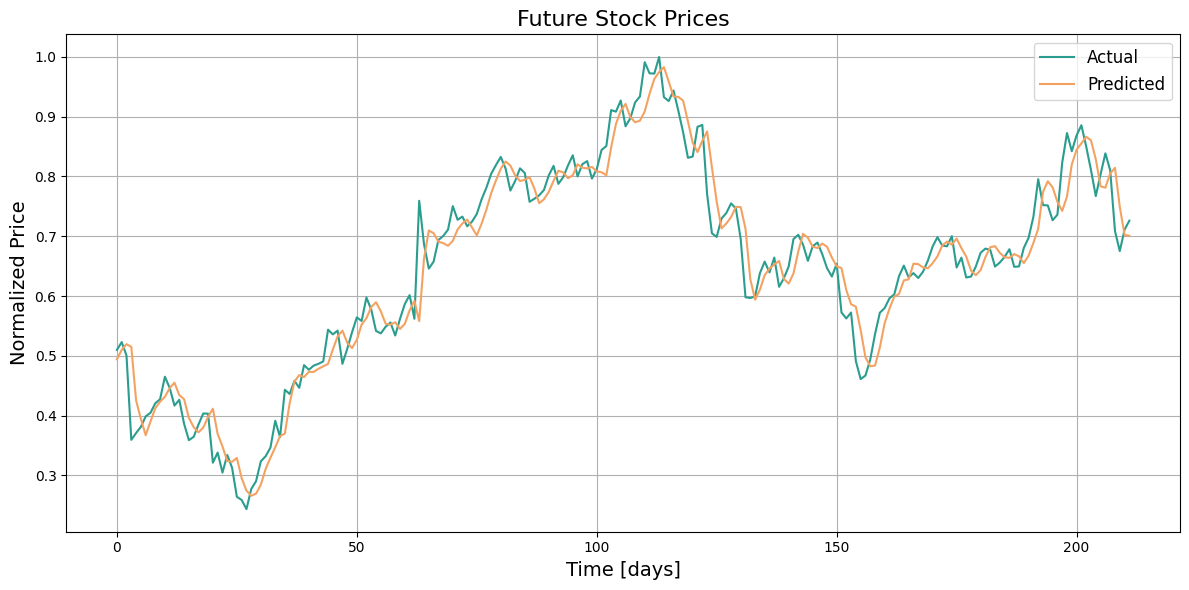

In [45]:
plt.figure(figsize=(12, 6))
idx = 0
plt.plot(y_test, color='#2a9d8f', label='Actual')  
plt.plot(y_pred, color='#f4a261', label='Predicted') 
plt.title('Future Stock Prices', fontsize=16)
plt.xlabel('Time [days]', fontsize=14)
plt.ylabel('Normalized Price', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid()
plt.tight_layout() 
plt.show()

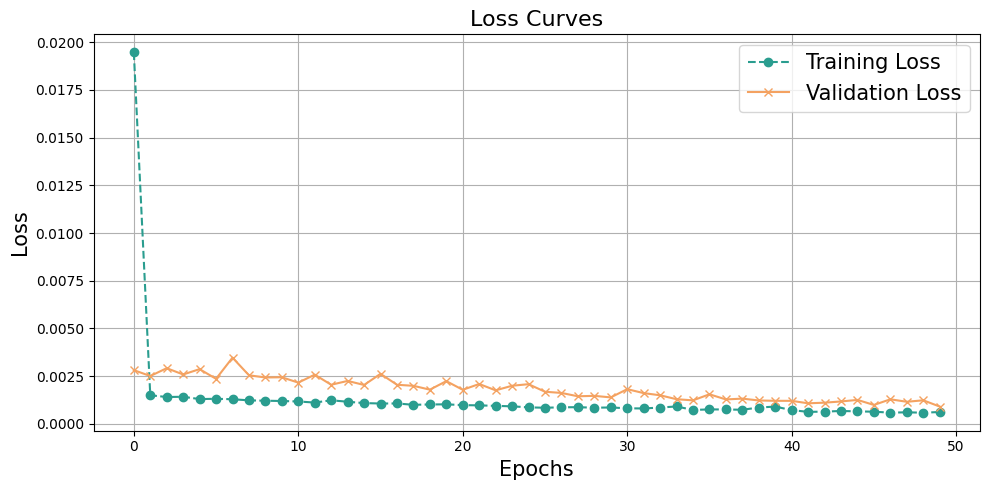

In [46]:
# Plotting the loss curves
def plot_loss_curve(history):
    plt.figure(figsize=(10, 5))

    # Loss curve
    plt.plot(history.history['loss'], label='Training Loss', color='#2a9d8f', marker='o', linestyle='--')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='#f4a261', marker='x', linestyle='-')
    
    plt.title('Loss Curves', fontsize=16)
    plt.xlabel('Epochs', fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.legend(fontsize=15)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function to plot the loss curve
plot_loss_curve(history)

In [47]:
print("### Model Summary ###")
model_lstm.summary()

### Model Summary ###


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 64)         │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │           825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,563 (365.48 KB)

 Trainable params: 31,187 (121.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,376 (243.66 KB)